# Introduction

Max imilian Haeussler suggested using scanpy to generate a cell browser before sending it to the UCSC single cell browser.

ah, so your matrix was misformatted, well, this browser I built for
you last night won't be very useful then, but run through our default
pipeline the inverted matrix looks like this:
https://hgwdev.gi.ucsc.edu/~max/cb/?ds=mouse-limb%2F10x

Maybe it's easier if you build a first version of the browser
yourself. Mistakes like a transposed matrix you would have very
quickly spotted by looking at the data in the browser...

To make this easier, Scanpy comes with a cell browser creation
function, it's called "cellbrowser()"
https://scanpy.readthedocs.io/en/stable/external/scanpy.external.exporting.cellbrowser.html#scanpy.external.exporting.cellbrowser

It will write your matrix and meta data into normal text files (easy
to grep, less, cat, cut, etc) and then convert these into a html
directory that you can open in your internet browser if copied to a
webserver (if you specify the -p option, you can even look at them on
your own laptop via http://localhost). I'm very interested in your
feedback, how easy this is to get to run. We have had 4-5 people now
build their own browsers, but it's always good to get more feedback.

In [1]:
import scanpy as scanpy
import pandas
import numpy
import os
import numpy

In [2]:
cwd = os.getcwd()

In [3]:
ls monocle/

190714MouseLimb10Xraw.h5ad@  200315_C1_categorical.h5ad
200120_10x.h5ad              200315_C1.h5ad
200120_10x.loom              200319GeneID.csv
200120_C1.h5ad               cellbrowser_cluster.png
200120_C1.loom               mouse/


In [4]:
ls monocle/mouse/*.csv

monocle/mouse/barcodes-to-cluster.csv


In [5]:
#c1_h5ad_filename = 'monocle/200120_C1.h5ad'
c1_h5ad_filename = os.path.join(cwd, 'monocle/200315_C1.h5ad')
c1_target = 'C1_200325'
adata = scanpy.read(os.path.expanduser(c1_h5ad_filename))

In [6]:
if not os.path.exists('cellbrowser'):
    os.mkdir('cellbrowser')

In [7]:
len(adata.var_names)

28983

In [8]:
adata.var_names

Index(['Gnai3', 'Cdc45', 'H19', 'Scml2', 'Apoh', 'Narf', 'Cav2', 'Klf6',
       'Scmh1', 'Cox5a',
       ...
       'RP24-393F8.2', 'RP24-68C1.4', 'RP23-56B11.8', 'RP23-370E6.2',
       'RP24-87I22.4', 'RP23-469D21.6', 'RP23-462P13.1', 'RP24-424K5.5',
       'RP24-331B5.1', 'RP23-445K23.3'],
      dtype='object', length=28983)

In [9]:
adata.var_keys()

['feature_genes']

In [10]:
adata.varm_keys()

[]

In [11]:
adata.obs_keys()

['nCount_RNA',
 'nFeature_RNA',
 'percent_mt',
 'stage',
 'n_counts',
 'library_batch',
 'cell_type',
 'C1run_batch']

In [12]:
for obs_name in adata.obs.keys():
    print("{:20} {:10} {:20}".format(
        obs_name,
        str(adata.obs[obs_name].dtype),
        str(type(adata.obs[obs_name].iloc[0]))))

nCount_RNA           float32    <class 'numpy.float32'>
nFeature_RNA         int32      <class 'numpy.int32'>
percent_mt           float32    <class 'numpy.float32'>
stage                category   <class 'str'>       
n_counts             float32    <class 'numpy.float32'>
library_batch        category   <class 'str'>       
cell_type            category   <class 'str'>       
C1run_batch          category   <class 'numpy.int64'>


In [13]:
batch_str = ['run_{}'.format(x) for x in adata.obs['C1run_batch']]

In [14]:
adata.obs['C1run_batch'] = batch_str

In [15]:
adata.obs_names

Index(['x18042_A1', 'x18042_A2', 'x18042_A3', 'x18042_A4', 'x18042_A5',
       'x18042_A6', 'x18042_A7', 'x18042_A8', 'x18042_A9', 'x18042_A11',
       ...
       'x20038_F3', 'x20038_F4', 'x20038_F5', 'x20038_F6', 'x20038_F7',
       'x20038_F8', 'x20038_F9', 'x20038_F10', 'x20038_F11', 'x20038_F12'],
      dtype='object', length=920)

In [16]:
adata.obsm.keys()

KeysView(AxisArrays with keys: X_tsne, X_umap)

In [17]:
adata.uns_keys()

['C1run_batch_colors', 'cell_type_colors', 'library_batch_colors']

In [18]:
cell_type = dict(adata.obs['cell_type'])

In [19]:
adata.uns_keys()

['C1run_batch_colors', 'cell_type_colors', 'library_batch_colors']

... storing 'C1run_batch' as categorical


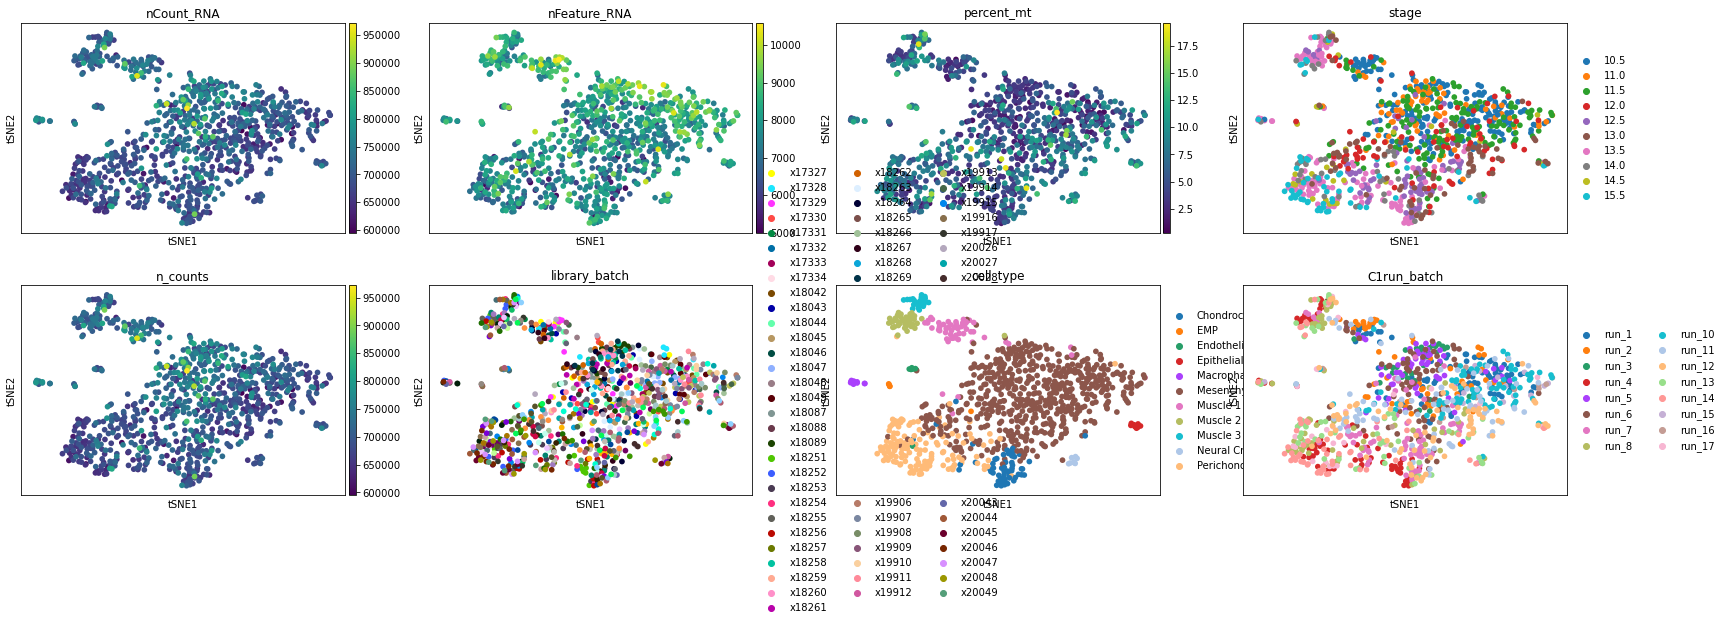

In [20]:
scanpy.pl.tsne(adata, color=adata.obs.keys())

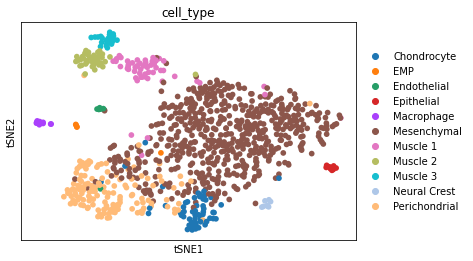

In [21]:
scanpy.pl.tsne(adata, color=['cell_type'])

#scanpy.external.exporting.cellbrowser(adata, data_dir, data_name, embedding_keys=None, annot_keys=('louvain', 'percent_mito', 'n_genes', 'n_counts'), cluster_field='louvain', nb_marker=50, skip_matrix=False, html_dir=None, port=None, do_debug=False)

In [22]:
c1_project = os.path.join(cwd, 'cellbrowser', c1_target)
c1_docroot = os.path.expanduser(
    os.path.join('~/public_html/cellbrowser/'))
if not os.path.exists(c1_project):
    os.mkdir(c1_project)
if not os.path.exists(c1_docroot):
    os.mkdir(c1_docroot)

In [23]:
with open('cellbrowser/C1_200325/desc.conf', 'wt') as outstream:
    outstream.write("""title = "High depth C1 smartseq single cell RNA-seq mouse forelimb embryonic developmental time course."

# a thumbnail image of some nice image representing your dataset, sometimes it's figure 1, sometimes 
# the journal cover, or just a screenshot of the t-SNE plot. If the file is bigger than 400px,
# optimize the image size to something smaller that can load progressively with this Unix command:
# convert myImage.png -sampling-factor 4:2:0 -strip -quality 85 -interlace JPEG -colorspace sRGB -resize 400^ thumb.jpg

#image = "thumb.jpg"

# abstract of paper or dataset summary text
# abstract = "Please edit desc.conf to change this text or comment out the abstract= line and create abstract.html in the same directory as desc.conf"

# methods: please describe roughly what the samples are and how you processed them computationally
# methods = "Please edit desc.conf to change this text or comment out the methods= line and create methods.html in the same directory as desc.conf"

# All URLs can contain a optional description after a space
# URL to pre-print
#biorxiv = "https://www.biorxiv.org/content/123/123.full Strangelove et al."
# URL to paper fulltext
#paper_url = "http://www.nature.com/xxx Strangelove et al, Nature 2021"
# URL to some other dataset related website, e.g. the hosting lab's own viewer
#other_url= "http://university.edu/lab/dataset Our Lab Website"
# DOI
#doi="xxx"
#

# PMID
#pmid = "12343234 Strangelove et al"
# GEO Series accession, usually starts with GSE
#geo_series = "GSE25097"
# dbGaP accession, usually starts with phs.
#dbgap = "phs000424.v7.p2"
# arrayexpress accession
# arrayexpress = "xxx"
# ENA project accession
# ena_project = "ENAP12341"
# SRA accession
# sra_study = "xxxx"
# NBCI Bioproject acccession
#bioproject = "xxxx"
#
# You can add a file with the original raw data, if needed. It gets copied over and added to the Downloads tab, with a note
rawMatrixFile= "200315_C1_categorical.h5ad"
rawMatrixNote= "Scanpy compatible C1 matrix file"

submitter = "Diane Trout"
version = 200325
submission_date = "2019-04-22"
lab = "Barbara Wold"
institute = "California Institute of Technology"
body_part = "forlimb"
#
# Any other information you want to show on the dataset info page
#custom = {"sample barcode": "1231-HH11" }
#
""")


In [24]:
scanpy.external.exporting.cellbrowser(
    adata, 
    c1_project, 
    'C1_limb',
    annot_keys=['nCount_RNA', 'nFeature_RNA', 'percent_mt', 'stage', 'n_counts', 'library_batch', 'cell_type', 'C1run_batch', 'percent_mito'],
    cluster_field='cell_type',
    html_dir=c1_docroot)

INFO:root:Writing scanpy matrix (920 cells, 28983 genes) to /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/cellbrowser/C1_200325/exprMatrix.tsv.gz
INFO:root:Transposing matrix
INFO:root:Writing gene-by-gene, without using pandas
INFO:root:Writing 28983 genes in total
INFO:root:Wrote 0 genes
INFO:root:Wrote 2000 genes
INFO:root:Wrote 4000 genes
INFO:root:Wrote 6000 genes
INFO:root:Wrote 8000 genes
INFO:root:Wrote 10000 genes
INFO:root:Wrote 12000 genes
INFO:root:Wrote 14000 genes
INFO:root:Wrote 16000 genes
INFO:root:Wrote 18000 genes
INFO:root:Wrote 20000 genes
INFO:root:Wrote 22000 genes
INFO:root:Wrote 24000 genes
INFO:root:Wrote 26000 genes
INFO:root:Wrote 28000 genes
INFO:root:Writing t-SNE coords to /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/cellbrowser/C1_200325/tsne_coords.tsv
INFO:root:Writing UMAP coords to /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/cellbrowser/C1_200325/umap_coords.tsv
INFO:root:Filtering for >5 cells then do sc.tl.rank_genes_g

In [25]:
scanpy.external.exporting.cellbrowser?

In [26]:
mito_genes = adata.var_names.str.startswith('mt-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = numpy.sum(
    adata[:, mito_genes].X, axis=1) / numpy.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
#adata.obs['n_counts'] = adata.X.sum(axis=1).A1



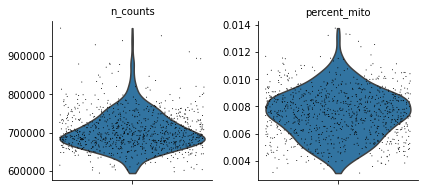

In [27]:
scanpy.pl.violin(adata, [ 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

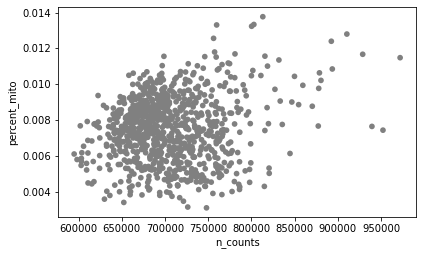

In [28]:
scanpy.pl.scatter(adata, x='n_counts', y='percent_mito')

In [29]:
scanpy.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

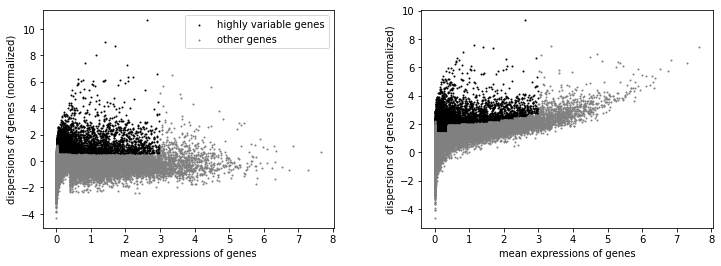

In [30]:
scanpy.pl.highly_variable_genes(adata)

In [31]:
scanpy.tl.pca(adata, svd_solver='arpack')

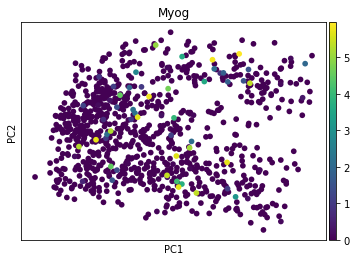

In [32]:
scanpy.pl.pca(adata, color='Myog')

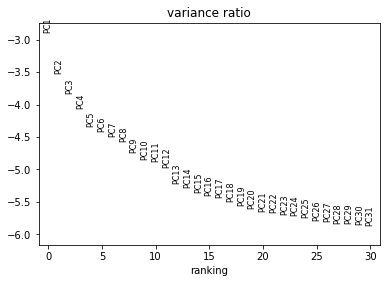

In [33]:
scanpy.pl.pca_variance_ratio(adata, log=True)

In [34]:
adata.write('monocle/200315_C1_categorical.h5ad')